# GROUP 5 EXAM
### MEMBERS
- KAGYEZI DAVIS
- MUSIIMENTA CYNTHIA
- BATAMULIZA FAITH

## Importing libraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('Activision_Blizzard.csv')
df.head()
# df1 = df.drop(columns=['Adj Close'])
# df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.312500,1.375000,1.166667,1.369792,1.214421,7226400
1,2000-01-04,1.343750,1.354167,1.187500,1.328125,1.177480,4262400
2,2000-01-05,1.317708,1.364583,1.312500,1.333333,1.182098,3390000
3,2000-01-06,1.322917,1.333333,1.296875,1.307292,1.159010,2430000
4,2000-01-07,1.322917,1.354167,1.291667,1.343750,1.191333,15549600


## Exploratory Data Analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5868 non-null   object 
 1   Open       5868 non-null   float64
 2   High       5868 non-null   float64
 3   Low        5868 non-null   float64
 4   Close      5868 non-null   float64
 5   Adj Close  5868 non-null   float64
 6   Volume     5868 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 321.0+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date']) # Convert the date to datetime format
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.312500,1.375000,1.166667,1.369792,1.214421,7226400
1,2000-01-04,1.343750,1.354167,1.187500,1.328125,1.177480,4262400
2,2000-01-05,1.317708,1.364583,1.312500,1.333333,1.182098,3390000
3,2000-01-06,1.322917,1.333333,1.296875,1.307292,1.159010,2430000
4,2000-01-07,1.322917,1.354167,1.291667,1.343750,1.191333,15549600


In [5]:
# df.describe().apply(lambda x: x.apply('{0:.5f}'.format)) # Remove scientific notation
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5868,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5.868000e+03
mean,2011-09-01 12:04:25.030674688,27.200409,27.521296,26.843414,27.190898,26.284963,9.430837e+06
min,2000-01-03 00:00:00,0.471354,0.502604,0.447917,0.471354,0.417890,3.348000e+05
25%,2005-11-01 18:00:00,6.545000,6.639610,6.443750,6.538750,5.797083,5.373475e+06
50%,2011-08-30 12:00:00,12.350000,12.505000,12.160000,12.330000,11.179425,7.587300e+06
75%,2017-06-29 06:00:00,46.275000,47.232501,45.632500,46.480000,45.406249,1.097200e+07
max,2023-04-28 00:00:00,103.820000,104.529999,102.550003,103.809998,102.699333,2.251328e+08
std,NaN,27.803254,28.072993,27.486007,27.782387,27.696254,8.047555e+06


In [6]:
corr = df.corr()
corr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.887475,0.887638,0.887599,0.887691,0.884281,-0.168863
Open,0.887475,1.000000,0.999897,0.999855,0.999761,0.999604,-0.175732
High,0.887638,0.999897,1.000000,0.999821,0.999876,0.999682,-0.174077
Low,0.887599,0.999855,0.999821,1.000000,0.999891,0.999769,-0.178773
Close,0.887691,0.999761,0.999876,0.999891,1.000000,0.999834,-0.176967
Adj Close,0.884281,0.999604,0.999682,0.999769,0.999834,1.000000,-0.176793
Volume,-0.168863,-0.175732,-0.174077,-0.178773,-0.176967,-0.176793,1.000000


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.duplicated().sum()

0

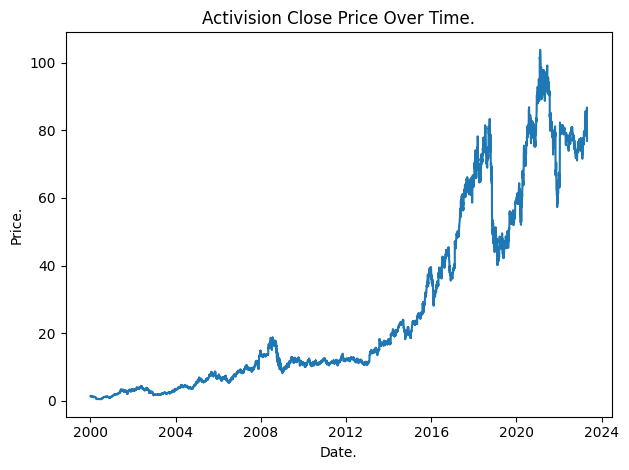

In [9]:
plt.plot(df['Date'], df['Close'])
plt.title('Activision Close Price Over Time.')
plt.xlabel('Date.')
plt.ylabel('Price.')
plt.tight_layout()
plt.savefig('LinePlot.png', dpi = 300);

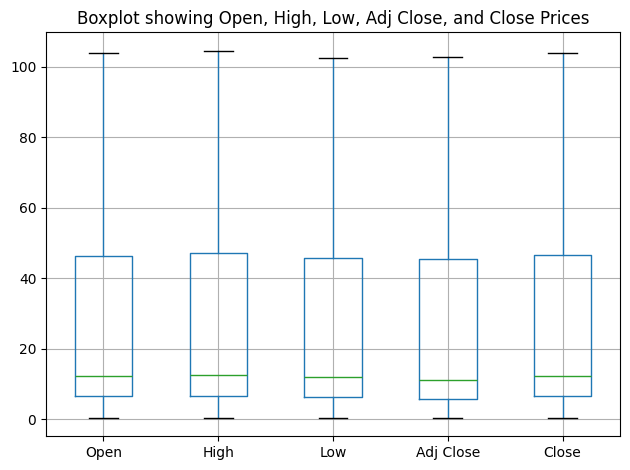

In [35]:
ax = df[['Open','High','Low','Adj Close','Close']].boxplot()
plt.title('Boxplot showing Open, High, Low, Adj Close, and Close Prices')
plt.tight_layout()
plt.savefig('BoxPlot.png', dpi = 300);

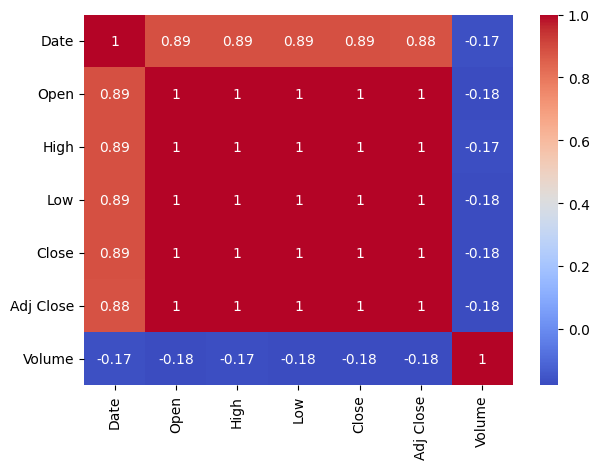

In [11]:
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.tight_layout()
plt.savefig('Heatmap.png', dpi = 300);

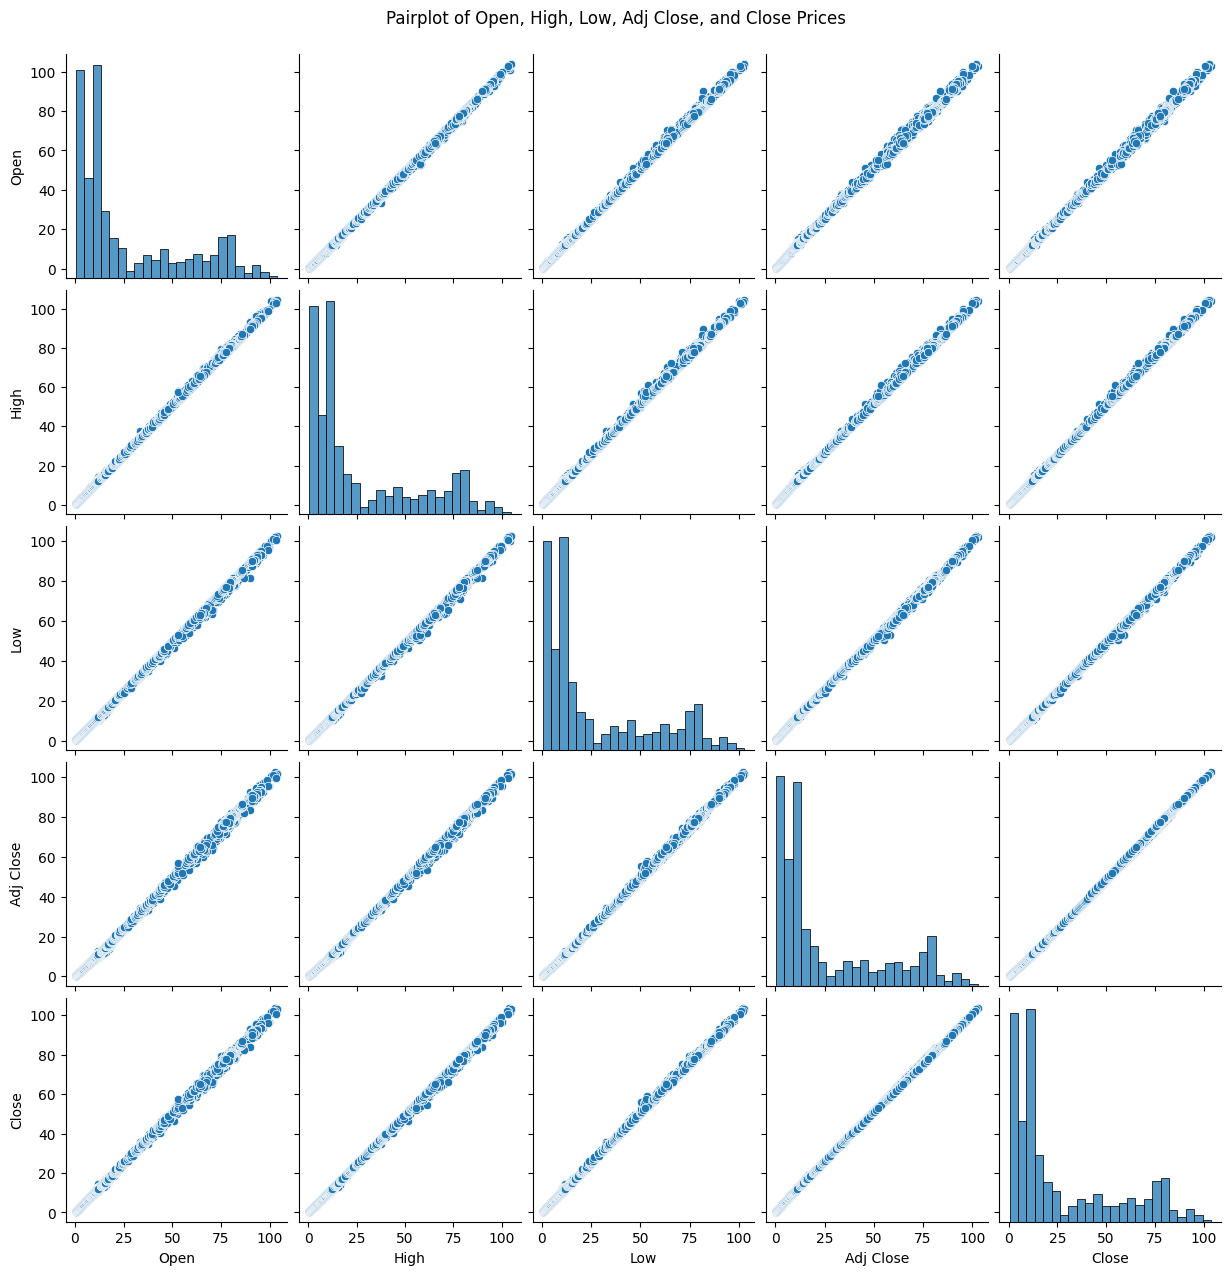

<Figure size 640x480 with 0 Axes>

In [33]:
sns.pairplot(df[['Open','High','Low','Adj Close','Close']])
plt.suptitle('Pairplot of Open, High, Low, Adj Close, and Close Prices', y=1.02)
plt.show()
plt.savefig('PairPlot.png', dpi = 300);

## Feature Engineering

In [13]:
# X = df[['Date','Open','High','Low','Volume']]
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1)

In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4107
1761
4107
1761


Scaling Features

In [16]:
# Instantiate the transformer
scaler = StandardScaler()

In [17]:
# Fit the training data
X_train = scaler.fit_transform(X_train) # Fit and transform

In [18]:
# Transform the testing data
X_test = scaler.transform(X_test)

## Model Building

Linear Regression

In [19]:
#instantiating the model
model = LinearRegression()

In [20]:
#model training
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# Model training. Fit on the training data
y_pred = model.predict(X_test)

In [37]:
# Evaluating
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.1868281469449182
0.9998393189467484


Random Forest Regressor

In [24]:
# Instantiate a default decision tree
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
#model testing
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Testing the model -Obtain predictions
y_pred = model.predict(X_test)

In [36]:
# Evaluating
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.1868281469449182
0.9998393189467484
